Hello! This is a Kaggle case study completed in Feb 2022 (https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness/)

The objective of this project is to explore a dataset containing customer information for treadmill products for a retail store called Cardio Good Fitness.

We want to identify differences between the customers of each product, as well as any relationships between the different attributes of the customers. Additionally, we want to look out for any other line of questioning that could be relevant for the business.

## Data Description
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file. The team identifies the following customer variables to study:

product purchased, TM195, TM498, or TM798; 

gender;

age, in years;

education, in years;

relationship status, single or partnered; 

annual household income ($);

average number of times the customer plans to use the treadmill each week;

average number of miles the customer expects to walk/run each week;

self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape. 

Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

### Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
df = pd.read_csv('CardioGoodFitness.csv')
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
179,TM798,48,Male,18,Partnered,4,5,95508,180
93,TM498,23,Male,16,Partnered,3,3,45480,64
61,TM195,34,Male,16,Single,4,5,51165,169
87,TM498,23,Male,14,Partnered,3,3,36384,95
157,TM798,26,Female,21,Single,4,3,69721,100


### Genereal Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Shape and Size of Dataset

In [5]:
df.shape

(180, 9)

In [6]:
df.size

1620

### Standard Deviation

In [7]:
df.std()

C:\Users\madhu\AppData\Local\Temp\ipykernel_10112\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

### Skewness

In [8]:
df.skew()

C:\Users\madhu\AppData\Local\Temp\ipykernel_10112\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

### Null Values

In [21]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Duplicates

In [126]:
df.duplicated().sum()

0

# Descriptive Statistics

## Q.1)	Which product is most used?

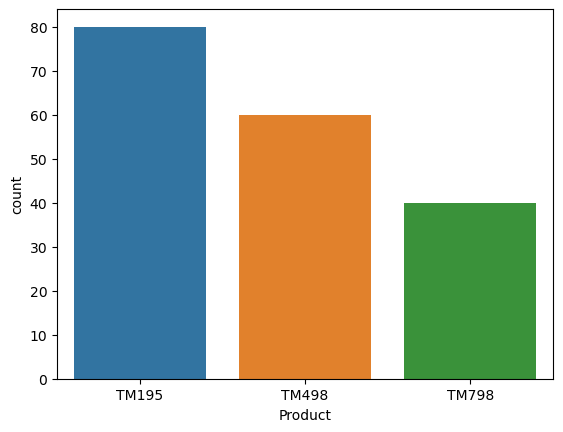

In [24]:
sns.countplot(data=df, x='Product')
plt.show()

#### Observations :
Most used product is "TM195", followed by "TM498" and least used product is TM798

## Q.2)	What is the average age of customers, is it same as median?  Justify your answer by plotting distribution of age.

In [27]:
print(f'Average age of customers is : {df["Age"].mean()}')
print(f'Median is : {df["Age"].median()}')

Average age of customers is : 28.788888888888888
Median is : 26.0


##### Let's plot distribution of age to see the difference between mean and median

Text(0.5, 0, 'Age')

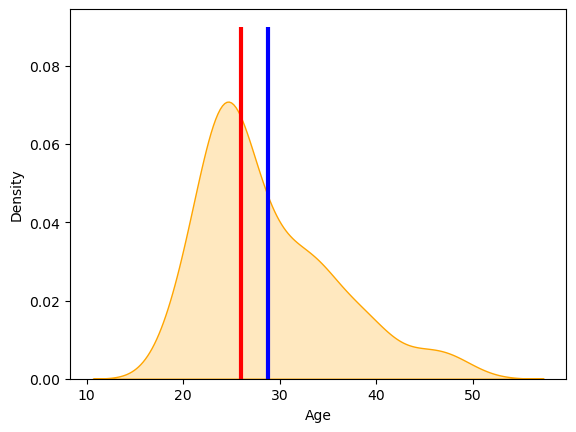

In [29]:
sns.kdeplot(data=df, x='Age', shade=True, color='orange')
plt.vlines(df['Age'].mean(), ymin=0, ymax=0.09, linewidth=3.0, color='blue')
plt.vlines(df['Age'].median(), ymin=0, ymax=0.09, linewidth=3.0, color='red')
plt.xlabel("Age")

#### Observations :
1. Age distribution is not mormal, it is postively skewed
2. Mean>Median

## Q.3)	How many males have income greater than average income? Also check whether income is positive or negatively skewed?

In [30]:
df['Income'].mean()

53719.57777777778

In [81]:
df['Gender'][(df['Gender']=='Male') & (df['Income']>df['Income'].mean())].count()

44

Text(0.5, 0, 'Income')

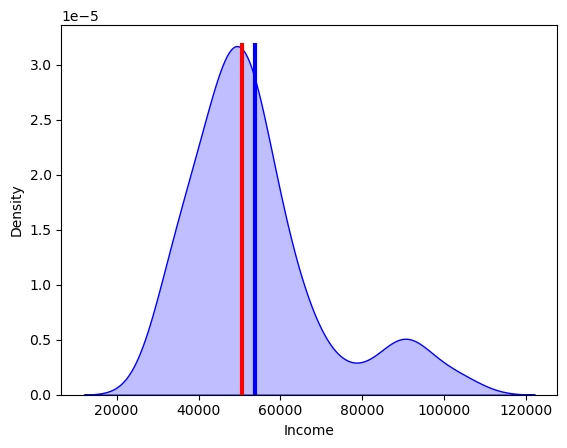

In [60]:
sns.kdeplot(data=df, x='Income', shade=True, color='blue')
plt.vlines(df['Income'].mean(), ymin=0, ymax=0.000032, linewidth=3.0, color='blue')
plt.vlines(df['Income'].median(), ymin=0, ymax=0.000032, linewidth=3.0, color='red')
plt.xlabel("Income")

#### Observations :
1. 44 Males have income greater than average income
2. Income distribution is not mormal, it is postively skewed
3. Mean>Median

## Q.4)	Find ratio of males and females

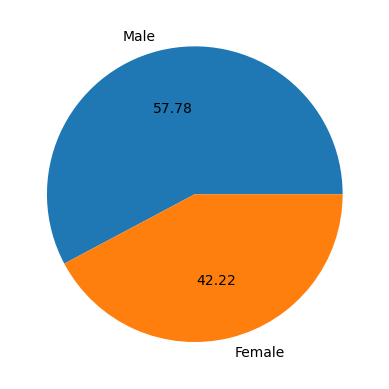

In [76]:
plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%.2f')
plt.show()

#### Observations :
1. Male to Female ratio is 58:42

## Q.5)	What percent of unmarried man have fitness level less than or equal to 3 ?

In [91]:
df['Gender'][df['Gender']=='Male'].count()

104

In [92]:
df['Gender'][(df['MaritalStatus']=='Single') & (df['Gender']=='Male') & (df['Fitness']<=3)].count()

26

In [93]:
# Ratio of unmarried men having fitness level less than oe equal to 3
100*(df['Gender'][(df['MaritalStatus']=='Single') & (df['Gender']=='Male') & (df['Fitness']<=3)].count())/df['Gender'][df['Gender']=='Male'].count()

25.0

#### Observations :
1. Only 25% of unmarried men have fitness level less than or equal to 3, and that's good!
2. this is because before marriage men focus much on their health

## Q.6)	What percent of married women have fitness level greater than 3? And what may be the reason behind that?

In [94]:
df['Gender'][df['Gender']=='Female'].count()

76

In [95]:
df['Gender'][(df['MaritalStatus']=='Partnered') & (df['Gender']=='Female') & (df['Fitness']>3)].count()

7

In [96]:
# Ratio of married women having fitness level greater than 3
100*(df['Gender'][(df['MaritalStatus']=='Partnered') & (df['Gender']=='Female') & (df['Fitness']>3)].count())/df['Gender'][df['Gender']=='Female'].count()

9.210526315789474

#### Observations :
1. Only 9% of married women have fitness level greater than 3, this may be because of after marriage women have a lot of responsibilities so they don't focus much on their health

## Q.7)	How many unmarried men have used treadmill less than 5 times in a week?

In [101]:
df['Gender'][df['Gender']=='Male'].count()

104

In [99]:
df['Gender'][(df['MaritalStatus']=='Single') & (df['Gender']=='Male') & (df['Usage']<5)].count()

35

#### Observations :
1. only 35 out of 104 unmarried males are using trademill less than 5 times in a week, which is quite a good number

## Q.8)	Give your suggestion, if there were null values in feature “Miles” then using which central tendency we can impute it? Justify your answer.

To answer this we will display a distribution plot for Miles and check if data is normally distributed or skewed.

Since Miles is continuous variable, if it is normally distributed then we can impute null values by mean and if it is skewed then by using median

In [104]:
print(f'Average miles of is : {df["Miles"].mean()}')
print(f'Median is : {df["Miles"].median()}')

Average miles of is : 103.19444444444444
Median is : 94.0


Text(0.5, 0, 'Miles')

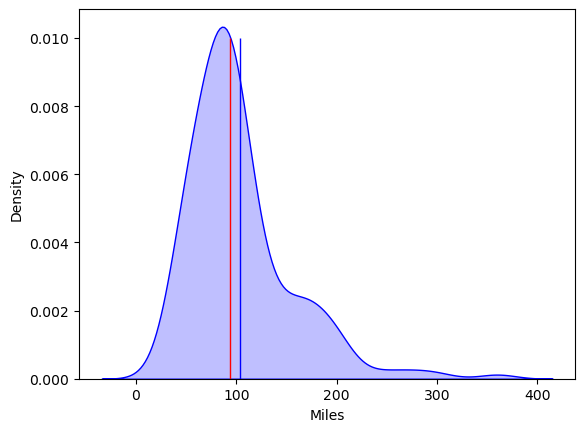

In [103]:
sns.kdeplot(data=df, x='Miles', shade=True, color='blue')
plt.vlines(df['Miles'].mean(), ymin=0, ymax=0.01, linewidth=1.0, color='blue')
plt.vlines(df['Miles'].median(), ymin=0, ymax=0.01, linewidth=1.0, color='red')
plt.xlabel("Miles")

#### Observations :
1. Miles distribution is not mormal, it is postively skewed
2. Mean>Median
**Hence, we will impute null values if present by using median.**

## Q.9)	Which product is least used by unmarried customers?

In [105]:
df[df['MaritalStatus']=='Single']

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
3,TM195,19,Male,12,Single,3,3,32973,85
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
...,...,...,...,...,...,...,...,...,...
165,TM798,29,Male,18,Single,5,5,52290,180
172,TM798,34,Male,16,Single,5,5,92131,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200


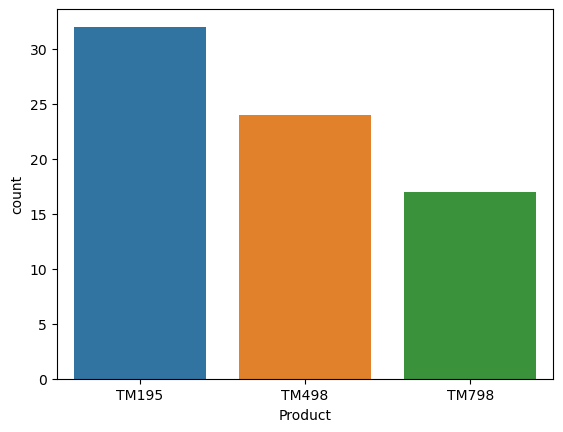

In [106]:
sns.countplot(data=df[df['MaritalStatus']=='Single'], x='Product')
plt.show()

#### Observations :
1. TM798 is least used by unmarried customers

## Q.10)	If there were null values in feature “Education” using which measure of center can we impute it?

To answer this we will display a distribution plot for Education and check if which value occurs most frequently.

Since Education is ordinal categorical variable, we will impute null values if available by mode that is most frequent value.

In [110]:
df['Education'].mode()[0]

16

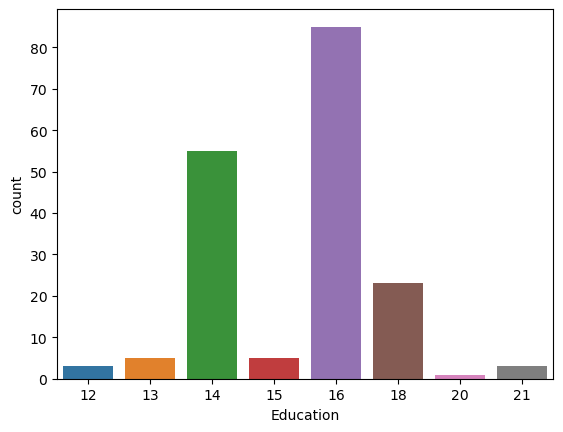

In [111]:
sns.countplot(data=df, x='Education')
plt.show()

#### Observations :
1. Since 16 is the most frequent value in Education, so we will impute null values if present in Education by 16

## Q.11)	Fitness is most related to which feature?

To check the correlation between features we use heatmap

<AxesSubplot:>

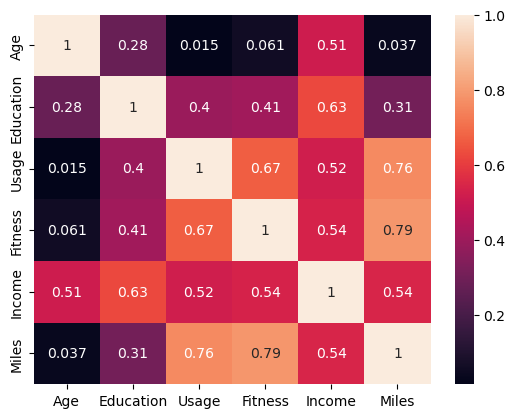

In [123]:
sns.heatmap(df.corr(), annot=True)

#### Observations :
1. Fitness is most related to miles, and looks obvious, as more the number of miles covered more fitness level will be.

## Q.12)	Find gender-wise average age

We will do this by using Groupby function

In [119]:
df.groupby(by='Gender').mean()['Age']

Gender
Female    28.565789
Male      28.951923
Name: Age, dtype: float64

#### Observations :
Average age of Males and females are approximately equal

## Q.13)	Does Education have high correlation with Income? If yes how can you practically relate it?

To check the correlation between features we use heatmap

<AxesSubplot:>

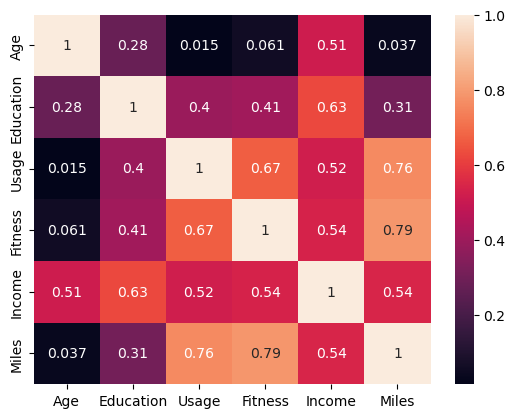

In [124]:
sns.heatmap(df.corr(), annot=True)

#### Observations :
1. Yes, Education have high positive correlation with Income
2. This looks very obvious as, more the educartion level more income a person will have

## Q.14)	Is there any negatively skewed feature?

In [125]:
df.skew()

C:\Users\madhu\AppData\Local\Temp\ipykernel_10112\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

#### Observations :
1. No feature is negatively skewed
2. Income, Miles and Age have positive skewness and rest of the features are approximately normally distributed

**END OF DOCUMENT**